In [1]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from dataset import MNIST
from data_utils import *

In [13]:
def eval_transform(image_dir):
    resizer = transforms.Resize((28, 28))
    grayscaler = transforms.Grayscale(1)
    
    image_pt = read_and_convert_image_to_pt(image_dir)
    image_pt = resizer(image_pt)
    image_pt = grayscaler(image_pt) if image_pt.size(0) == 3 else image_pt
    # image_pt = 255 - image_pt
    image_pt = normalize(image_pt / 255, 0.5, 0.5)
    
    return image_pt

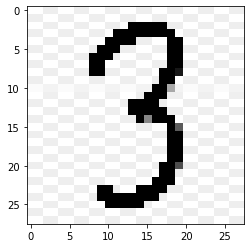

In [14]:
img = eval_transform("dataset/eval/testimg_1.png")
plt.imshow(img.permute((1, 2, 0)), cmap="gray")

In [4]:
mnist_test = MNIST("dataset/mnist", train=False,
                    transform=image_transform, target_transform=label_transform)

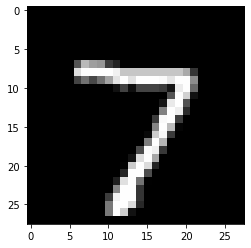

In [5]:
plt.imshow(mnist_test[0][0].permute((1,2,0)), cmap="gray")

In [6]:
mnist_test[0][0]

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

In [7]:
img_samp = mnist_test[0][0]
img_samp.shape

torch.Size([1, 28, 28])

In [8]:
import torch
padded = torch.FloatTensor(1, 30, 30).fill_(0)
padded[0, :img_samp.size(1), :img_samp.size(-1)] = img_samp
padded

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           0.0000,  0.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           0.0000,  0.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           0.0000,  0.0000],
         [-1.0000, -1.0000, -1.0000, 

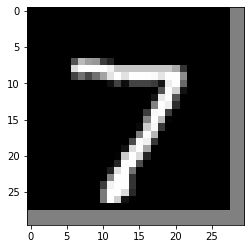

In [9]:
plt.imshow(padded.permute((1,2,0)), cmap="gray")

In [11]:
c = custom_collate_fn(30, 30, img_samp)

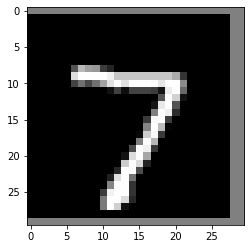

In [12]:
plt.imshow(c.permute((1,2,0)), cmap="gray")